In [35]:
import numpy as np
from scipy.integrate import quad
import typing
import matplotlib.pyplot as plt

PARAMS = [{"lmbda" : 0.5, "mu" : 1}, {"lmbda" : 1, "mu" : 3}, {"lmbda" : 5, "mu" : 1}, {"lmbda" : 10, "mu" : 3}]

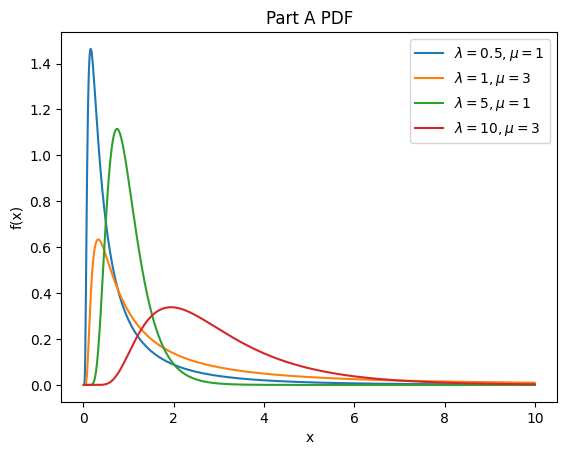

In [36]:
# FUNCTION f ( x | lambda , mu )
def funf(x:float, lmbda:float, mu:float) -> float:
    y = np.where(x > 0, np.sqrt(lmbda / (2 * np.pi * x**3)) * np.exp((-lmbda / (2 * mu**2 * x)) * (x - mu)**2), 0)
    return y

funf(2, 0.5, 1)
delta = 0.01
x = np.arange(0 + delta, 10, delta)

for param in PARAMS:
    y = funf(x, **param)
    plt.plot(x, y, label=r'$\lambda={lmbda}, \mu={mu}$'.format(**param))

plt.legend(loc="upper right")
plt.title("Part A PDF")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.show()

In [37]:
def romberg(f:typing.Callable, a:float, b:float, step:int, params:typing.Dict[float, float] = {}) -> float:
    if step <= 1:
        raise Exception("Step must be greater than one!")
    
    delta_x = (b - a) / step
    x = np.linspace(a, b, step)
    y = f(x, **params)
    return 0.5 * delta_x * (y[0] + 2 * sum(y[1:-1]) + y[-1])

def riemann(f:typing.Callable, a:float, b:float, delta:float, params:typing.Dict[float, float] = {}) -> float:
    x = np.arange(a, b, delta)
    y = f(x, **params)
    return np.sum(y * delta) 

def f(x):
    return -x**2



In [38]:
print(romberg(funf, 0, 1000, 10000000, PARAMS[0]))
print(riemann(funf, 0, 1000, 0.001, PARAMS[0]))
print(quad(funf, 0, 1000, (0.5, 1)))


C:\Users\Marij\AppData\Local\Temp\ipykernel_30732\1654557807.py:3: RuntimeWarning: divide by zero encountered in divide
  y = np.where(x > 0, np.sqrt(lmbda / (2 * np.pi * x**3)) * np.exp((-lmbda / (2 * mu**2 * x)) * (x - mu)**2), 0)
C:\Users\Marij\AppData\Local\Temp\ipykernel_30732\1654557807.py:3: RuntimeWarning: invalid value encountered in multiply
  y = np.where(x > 0, np.sqrt(lmbda / (2 * np.pi * x**3)) * np.exp((-lmbda / (2 * mu**2 * x)) * (x - mu)**2), 0)


0.9999998999976155
0.9999999999999998
(0.9999999999997695, 6.093919971333443e-10)
